In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
import pandas as pd
from streamlit import stop

# Original data
data = [
    (2, 'no leak'), 
    (4, '2% leak at 0 km'),
    (12, 'no leak'),
    (4, '4% leak at 0 km'),
    (12, 'no leak'),
    (4, '2% leak at 130 km'),
    (12, 'no leak'),
    (4, '4% leak at 130 km'),
    (12, 'no leak'),
    (4, '2% leak at 250 km'),
    (12, 'no leak'),
    (4, '4% leak at 250 km'),
    (12, 'no leak'),
    (4, '10% leak at 0 km'),
    (18, 'no leak')
]

# start = start + 5 secons, last is sinclusive
data_corrected = [
    (0, 2, 'no leak'), 
    (2, 6, '2% leak at 0 km'),
    (6, 19, 'no leak'),
    (19, 23, '4% leak at 0 km'),
    (23, 35, 'no leak'),
    (35, 39, '2% leak at 130 km'),
    (39, 52, 'no leak'),
    (52, 56, '4% leak at 130 km'),
    (56, 69, 'no leak'),
    (69, 73, '2% leak at 250 km'),
    (73, 86, 'no leak'),
    (86, 90, '4% leak at 250 km'),
    (90, 102, 'no leak'),
    (102, 106, '10% leak at 0 km'),
    (106, 120, 'no leak')
]
cumsum = 0
for start, stp, state in data_corrected:
    print(f'duration is {stp-start}')
    cumsum += (stp - start)

print(cumsum)


state_to_fault = {
    'no leak': 'no_fault',
    '2% leak at 0 km': '2pct0',
    '4% leak at 0 km': '4pct0',
    '2% leak at 130 km': '2pct130',
    '4% leak at 130 km': '4pct130',
    '2% leak at 250 km': '2pct250',
    '4% leak at 250 km': '4pct250',
    '10% leak at 0 km': '10pct0'
}

#load the exsting data
df = pd.read_csv(r'G:\GlitchDetect\data\long_run_varying_flows.csv')

start_end_dur = []
start = 0
for hrs, state in data:
    duration = hrs * 3600
    end = start + duration - 5
    start_end_dur.append((start, end, duration, state))
    
    start = start + duration
    
total_readings = 0
for start, end, dur, state in start_end_dur:
    print(f'{state} starts at {start/3600} seconds, stays for {dur/3600}, ends at {end/3600} seconds and has {(end - start)//5 + 1} readings')
    total_readings += (end - start)//5 + 1

print(total_readings)

#label dataframe
df['State'] = None
df['label'] = None

for start, end, state in data_corrected:
    start = start * 3600
    end = end * 3600
    mask = (df['Seconds'] >= start) & (df['Seconds'] <= end)
    df.loc[mask, 'State'] = state
    df.loc[mask, 'label'] = state_to_fault[state]

df

df.to_csv(r'G:\GlitchDetect\data\long_run_varying_flows_labelled.csv', index=False)


duration is 2
duration is 4
duration is 13
duration is 4
duration is 12
duration is 4
duration is 13
duration is 4
duration is 13
duration is 4
duration is 13
duration is 4
duration is 12
duration is 4
duration is 14
120
no leak starts at 0.0 seconds, stays for 2.0, ends at 1.9986111111111111 seconds and has 1440 readings
2% leak at 0 km starts at 2.0 seconds, stays for 4.0, ends at 5.998611111111111 seconds and has 2880 readings
no leak starts at 6.0 seconds, stays for 12.0, ends at 17.99861111111111 seconds and has 8640 readings
4% leak at 0 km starts at 18.0 seconds, stays for 4.0, ends at 21.99861111111111 seconds and has 2880 readings
no leak starts at 22.0 seconds, stays for 12.0, ends at 33.99861111111111 seconds and has 8640 readings
2% leak at 130 km starts at 34.0 seconds, stays for 4.0, ends at 37.99861111111111 seconds and has 2880 readings
no leak starts at 38.0 seconds, stays for 12.0, ends at 49.99861111111111 seconds and has 8640 readings
4% leak at 130 km starts at 50.

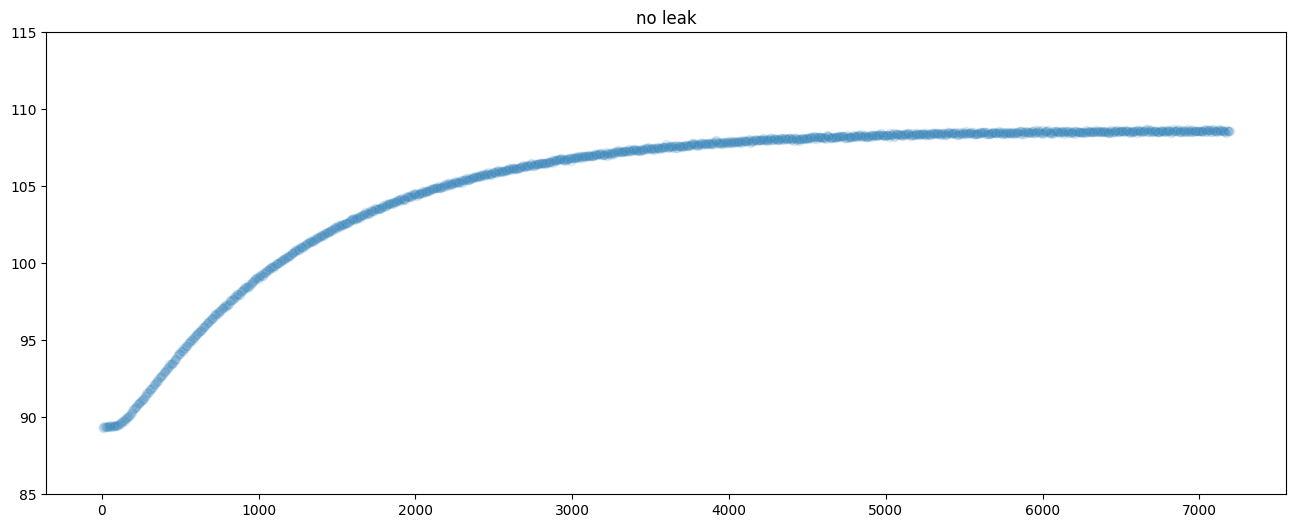

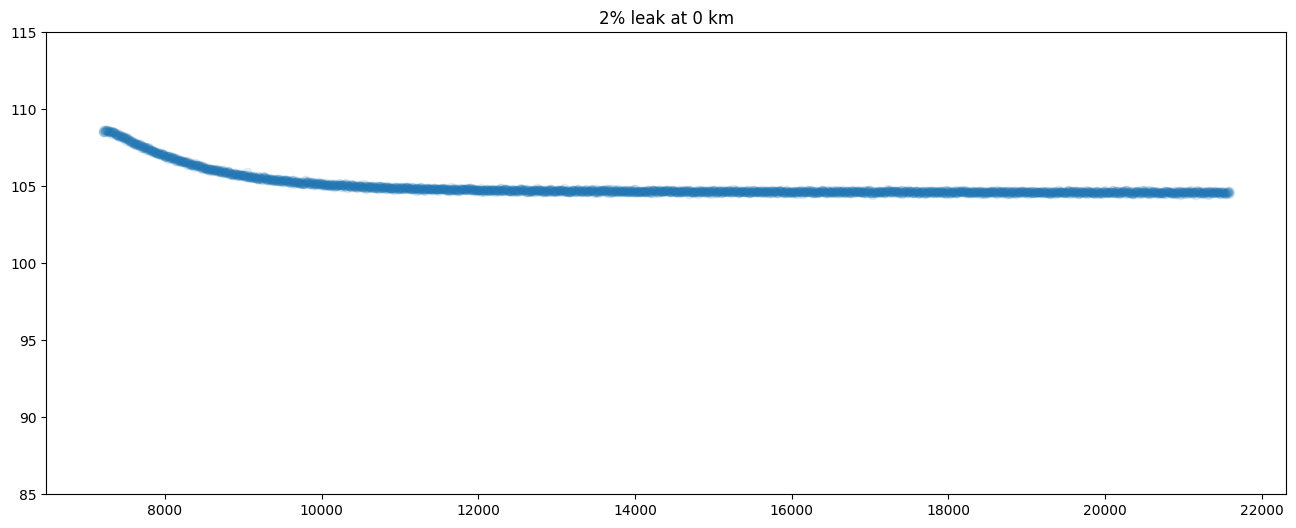

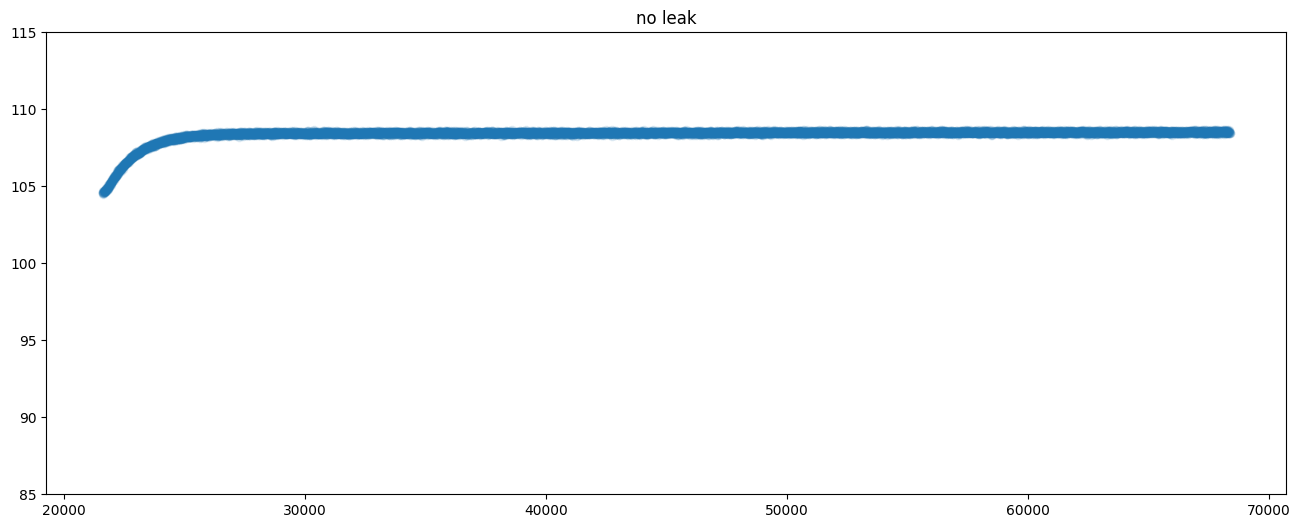

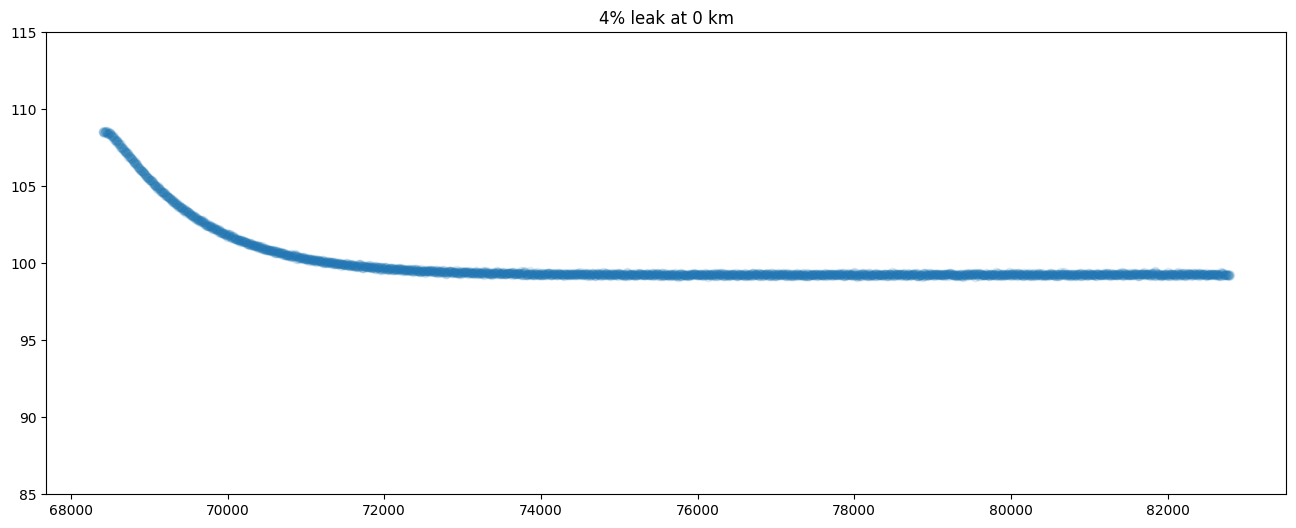

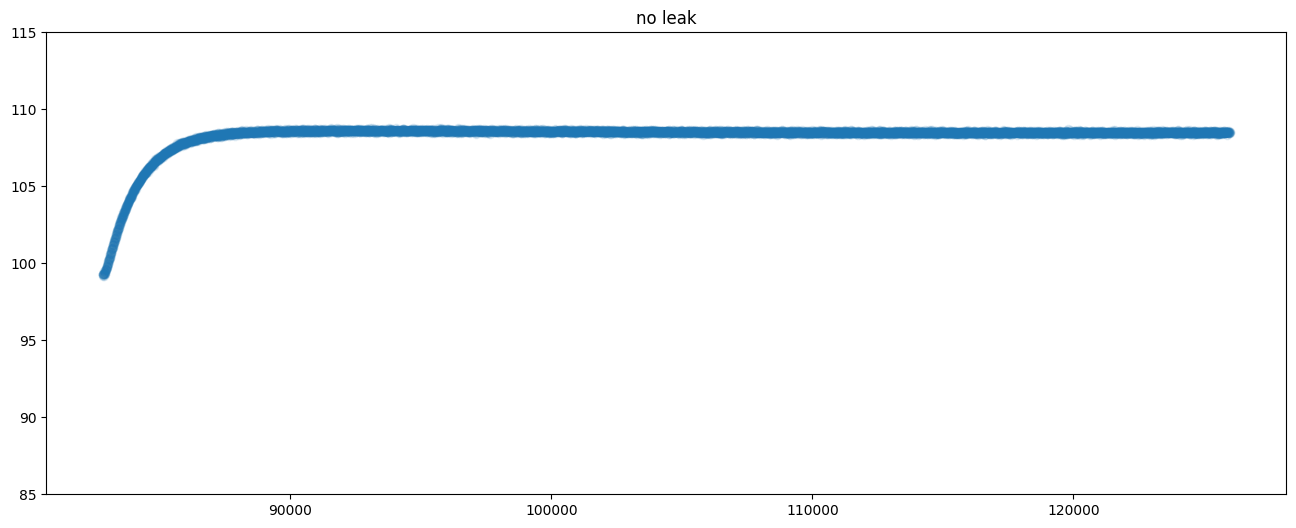

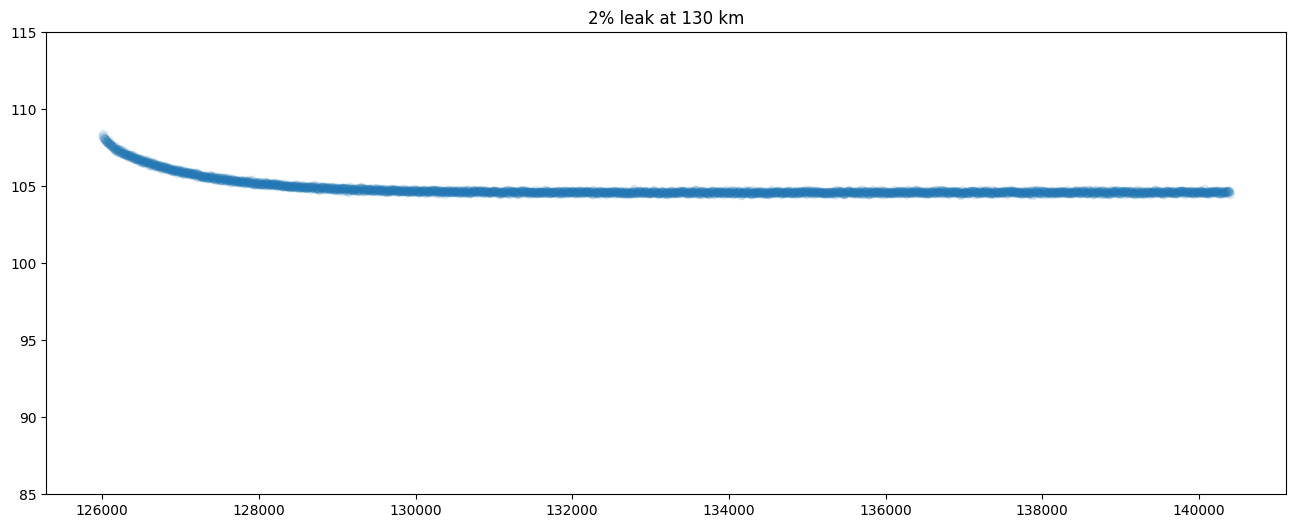

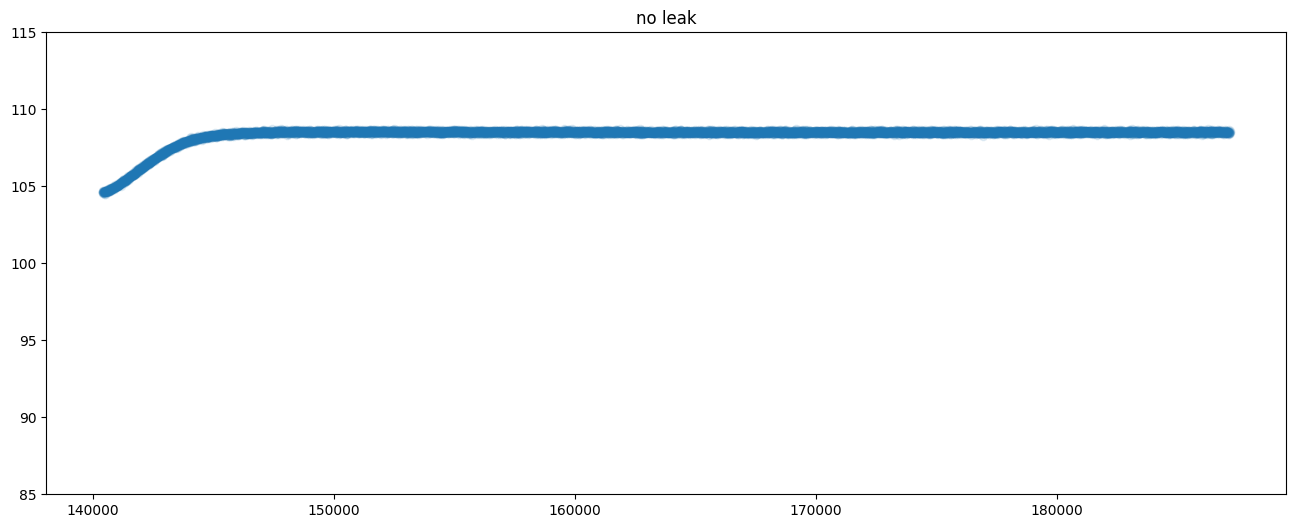

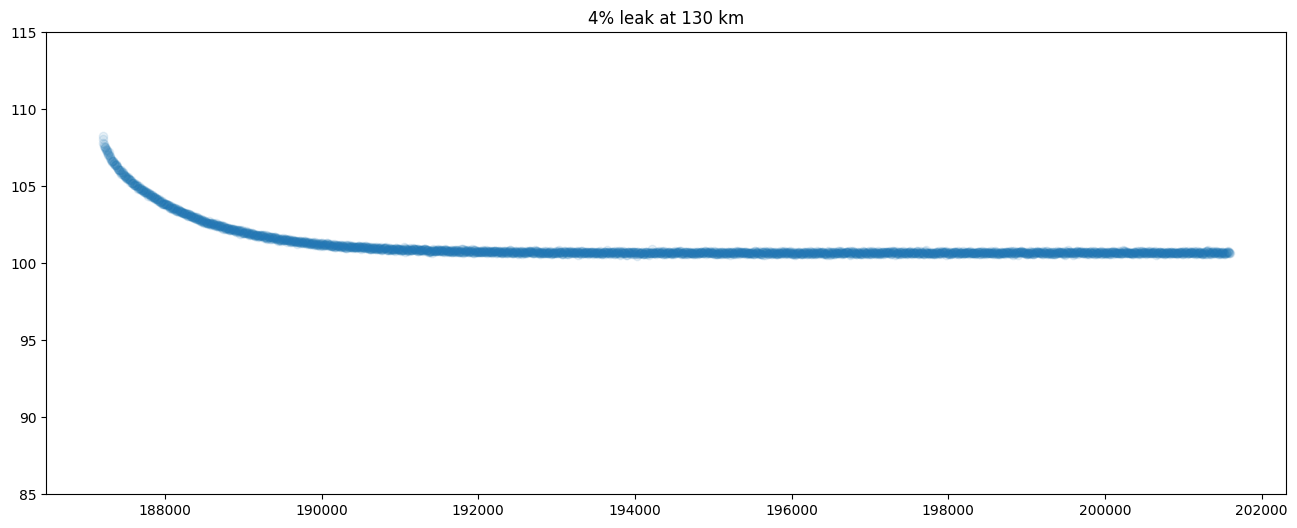

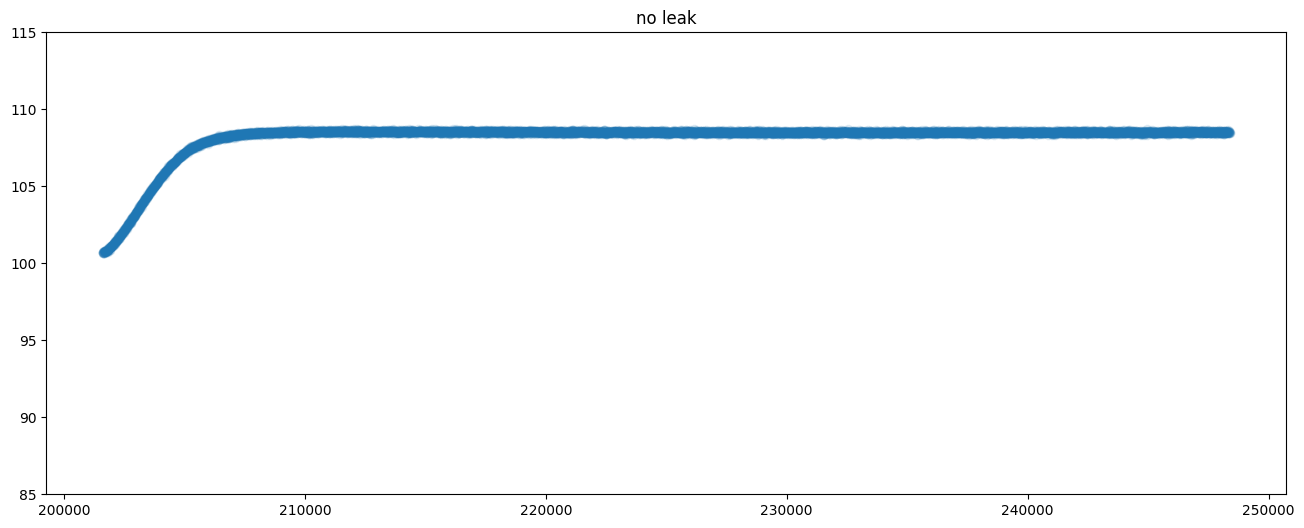

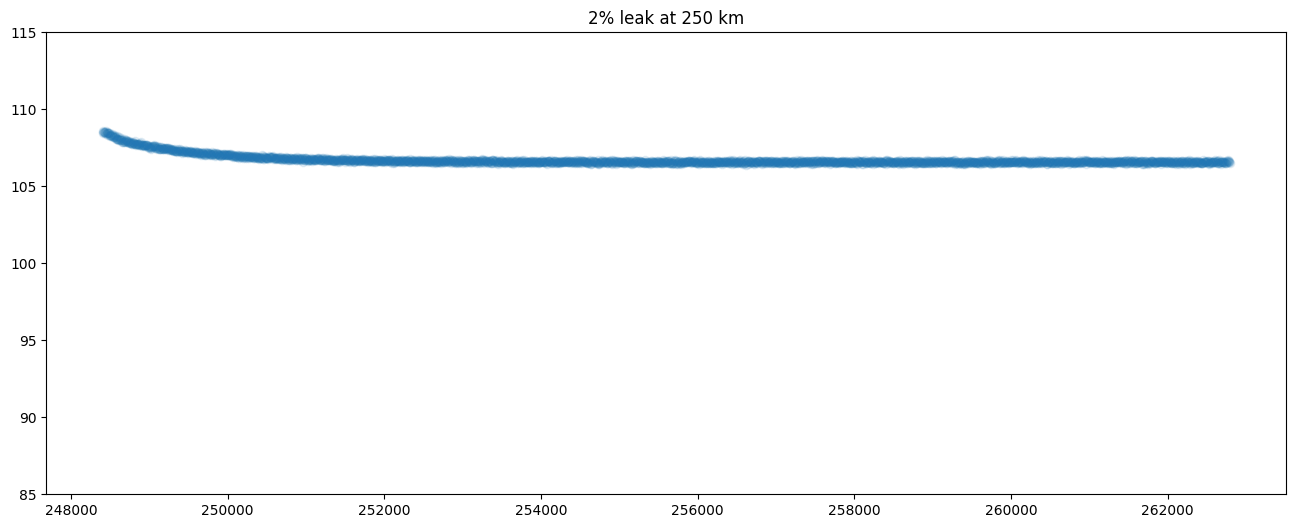

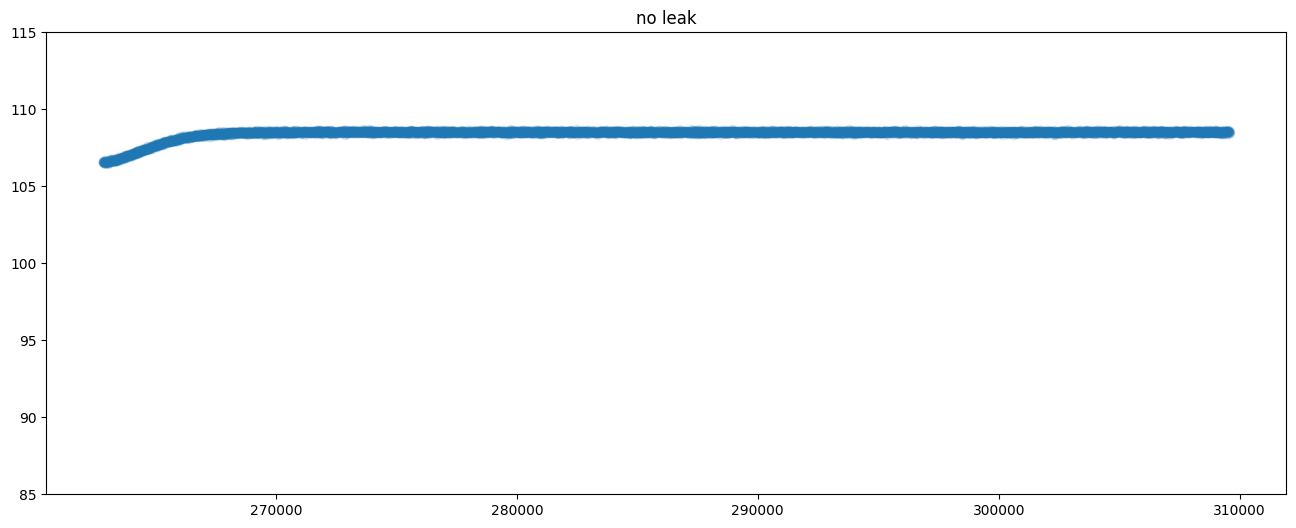

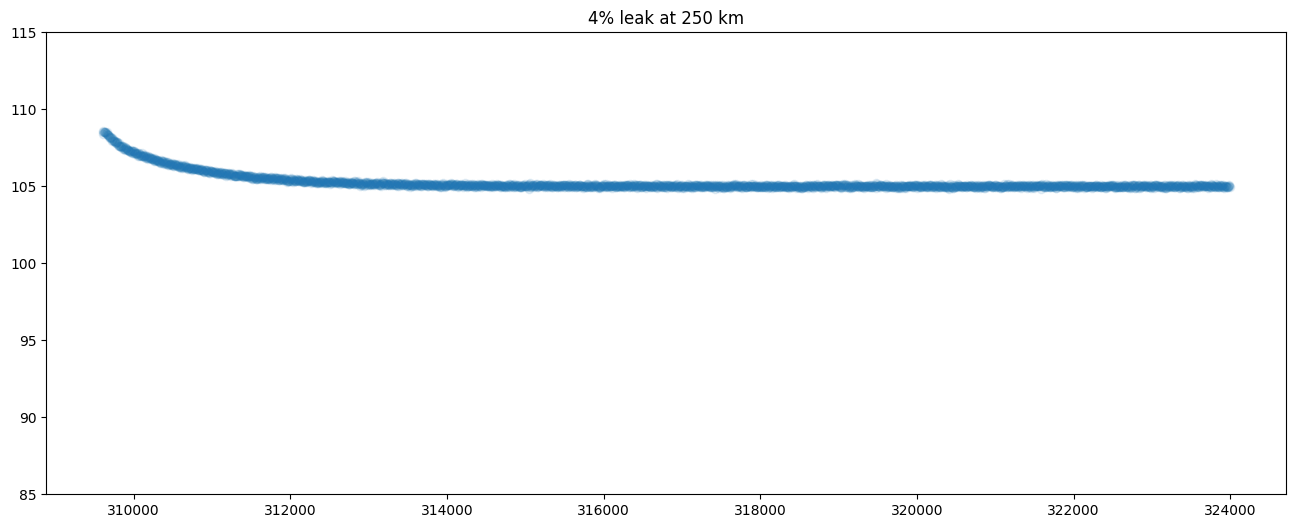

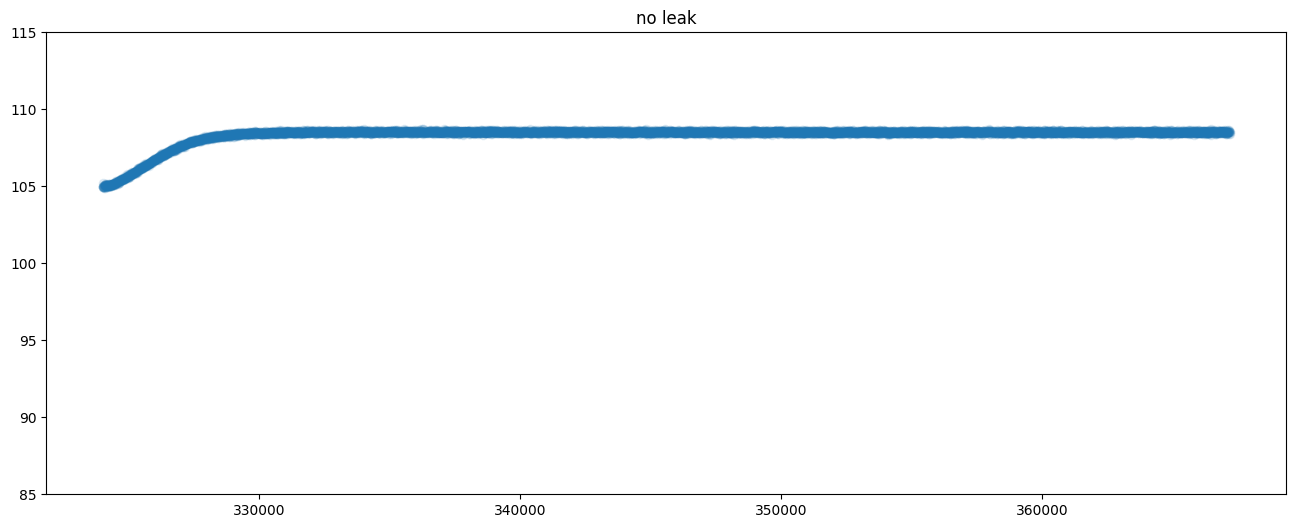

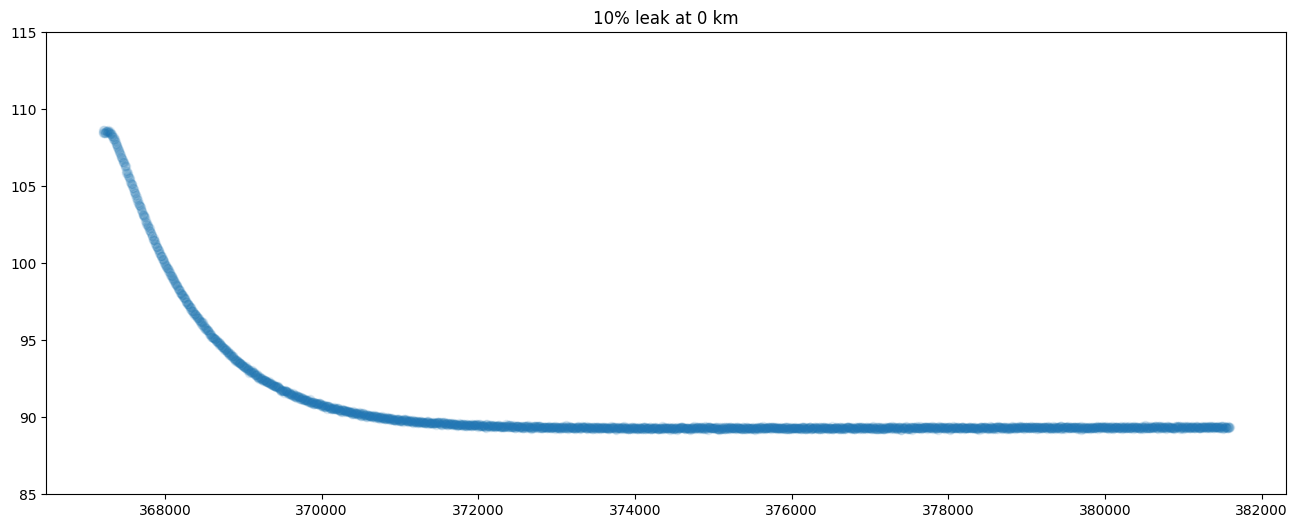

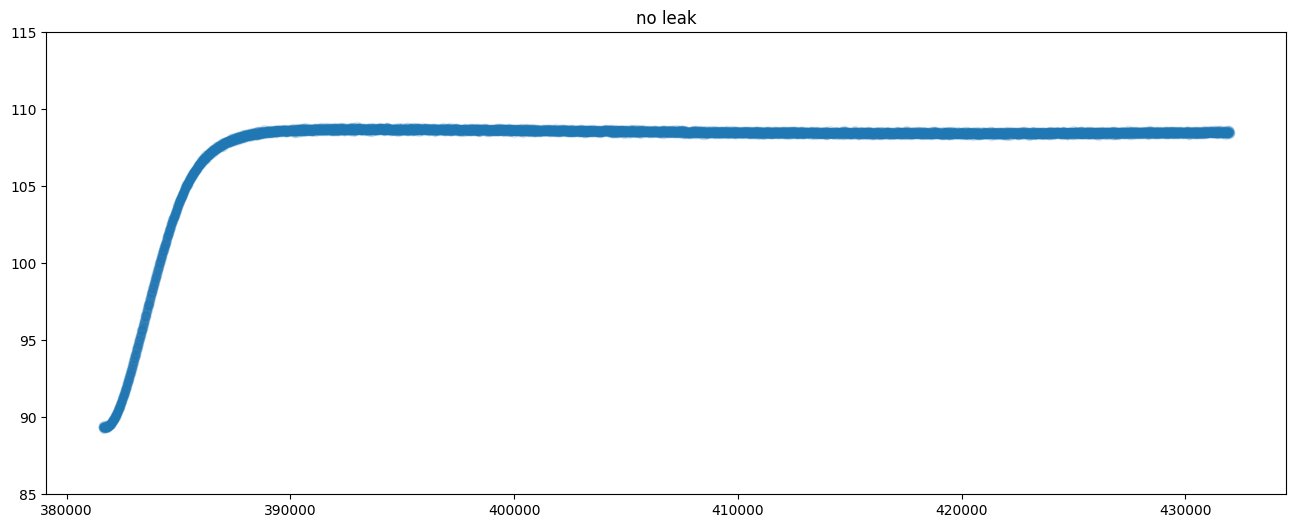

In [74]:
for start, end, state in data_corrected:
    plt.figure(figsize=(16,6))
    l = 3600 * start
    u = 3600 * end
    mask = (df['Seconds'] > l) & (df['Seconds'] < u)
    plt.scatter(df['Seconds'][mask], df['11-PT-1203'][mask], alpha=0.1)
    plt.title(state)
    plt.ylim(85, 115)
    plt.show()


In [27]:
import pandas as pd
from datetime import timedelta

# Full list of state intervals (State, Start Timestamp, Duration in hours)
data = [
    ('no leak', '2025-09-03 12:00:00', 2),
    ('2% leak at 0 km', '2025-09-03 14:00:00', 4),
    ('no leak', '2025-09-03 18:00:00', 12),
    ('4% leak at 0 km', '2025-09-04 06:00:00', 4),
    ('no leak', '2025-09-04 10:00:00', 12),
    ('2% leak at 130 km', '2025-09-04 22:00:00', 4),
    ('no leak', '2025-09-05 02:00:00', 12),
    ('4% leak at 130 km', '2025-09-05 14:00:00', 4),
    ('no leak', '2025-09-05 18:00:00', 12),
    ('2% leak at 250 km', '2025-09-06 06:00:00', 4),
    ('no leak', '2025-09-06 10:00:00', 12),
    ('4% leak at 250 km', '2025-09-06 22:00:00', 4),
    ('no leak', '2025-09-07 02:00:00', 12),
    ('10% leak at 0 km', '2025-09-07 14:00:00', 4),
    ('no leak', '2025-09-07 18:00:00', 18)
]

# Map states to labels
state_to_fault = {
    'no leak': 'no_fault',
    '2% leak at 0 km': '2pct0',
    '4% leak at 0 km': '4pct0',
    '2% leak at 130 km': '2pct130',
    '4% leak at 130 km': '4pct130',
    '2% leak at 250 km': '2pct250',
    '4% leak at 250 km': '4pct250',
    '10% leak at 0 km': '10pct0'
}

# Load your CSV (with Timestamp_IST column)
df1 = pd.read_csv(r'G:\GlitchDetect\data\long_run.csv', parse_dates=['Timestamp_IST'])

# Add empty columns for State and label
df1['State'] = None
df1['label'] = None

# Assign State and label based on absolute timestamp
for state, start_ts, duration_hr in data:
    start_ts = pd.to_datetime(start_ts)
    end_ts = start_ts + timedelta(hours=duration_hr)
    
    mask = (df1['Timestamp_IST'] >= start_ts) & (df1['Timestamp_IST'] < end_ts)
    df1.loc[mask, 'State'] = state
    df1.loc[mask, 'label'] = state_to_fault[state]

# Check the first few rows
print(df1[['Timestamp_IST','State','label']].head(20))

df1


         Timestamp_IST    State     label
0  2025-09-03 12:00:00  no leak  no_fault
1  2025-09-03 12:00:05  no leak  no_fault
2  2025-09-03 12:00:10  no leak  no_fault
3  2025-09-03 12:00:15  no leak  no_fault
4  2025-09-03 12:00:20  no leak  no_fault
5  2025-09-03 12:00:25  no leak  no_fault
6  2025-09-03 12:00:30  no leak  no_fault
7  2025-09-03 12:00:35  no leak  no_fault
8  2025-09-03 12:00:40  no leak  no_fault
9  2025-09-03 12:00:45  no leak  no_fault
10 2025-09-03 12:00:50  no leak  no_fault
11 2025-09-03 12:00:55  no leak  no_fault
12 2025-09-03 12:01:00  no leak  no_fault
13 2025-09-03 12:01:05  no leak  no_fault
14 2025-09-03 12:01:10  no leak  no_fault
15 2025-09-03 12:01:15  no leak  no_fault
16 2025-09-03 12:01:20  no leak  no_fault
17 2025-09-03 12:01:25  no leak  no_fault
18 2025-09-03 12:01:30  no leak  no_fault
19 2025-09-03 12:01:35  no leak  no_fault


,Seconds,Timestamp_IST,10-PI-1110,10-TI-1103,10-MOV1118,20-PT-1312,20-TE,20-MOV-1301,20-FIC-1301,20-MOV-1304,...,10-MOV-1140,MOV_3018,MOV_3018.1,11-PT-1203,TT-1201B,MOV_1206,MOV_3019,MOV_1203,State,label
0,0,2025-09-03 12:00:00,179.260691,24.999216,1,5.005890,30.458576,1,1798.581447,1,...,0,0,0,89.465891,28.087410,1,0,1,no leak,no_fault
1,5,2025-09-03 12:00:05,181.837495,25.001728,1,5.008043,30.456881,1,1798.371125,1,...,0,0,0,89.339392,28.071699,1,0,1,no leak,no_fault
2,10,2025-09-03 12:00:10,182.462210,24.992003,1,5.005038,30.436551,1,1798.360602,1,...,0,0,0,89.325991,28.054713,1,0,1,no leak,no_fault
3,15,2025-09-03 12:00:15,182.906253,25.000997,1,5.004514,30.464488,1,1796.779338,1,...,0,0,0,89.401665,28.086208,1,0,1,no leak,no_fault
4,20,2025-09-03 12:00:20,183.386065,24.999217,1,5.004816,30.461797,1,1797.930740,1,...,0,0,0,89.367269,28.044676,1,0,1,no leak,no_fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,431975,2025-09-08 11:59:35,218.382429,25.002084,1,5.005178,32.372711,1,1998.176187,1,...,0,0,0,108.633543,28.802638,1,0,1,no leak,no_fault
86396,431980,2025-09-08 11:59:40,218.210887,24.979941,1,5.002764,32.363440,1,2000.548791,1,...,0,0,0,108.508408,28.826272,1,0,1,no leak,no_fault
86397,431985,2025-09-08 11:59:45,218.072804,24.993012,1,5.004921,32.372217,1,1999.833234,1,...,0,0,0,108.426059,28.797880,1,0,1,no leak,no_fault
86398,431990,2025-09-08 11:59:50,218.342189,24.980833,1,4.998559,32.336549,1,1997.164920,1,...,0,0,0,108.539009,28.787692,1,0,1,no leak,no_fault


C:\Users\adith\AppData\Local\Temp\ipykernel_22928\1979842610.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))  # choose colormap


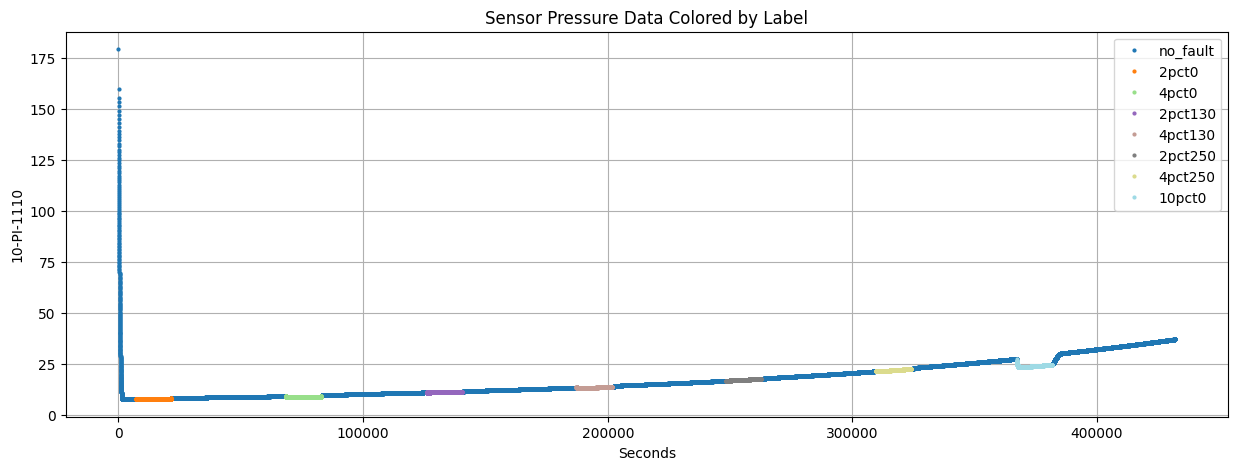

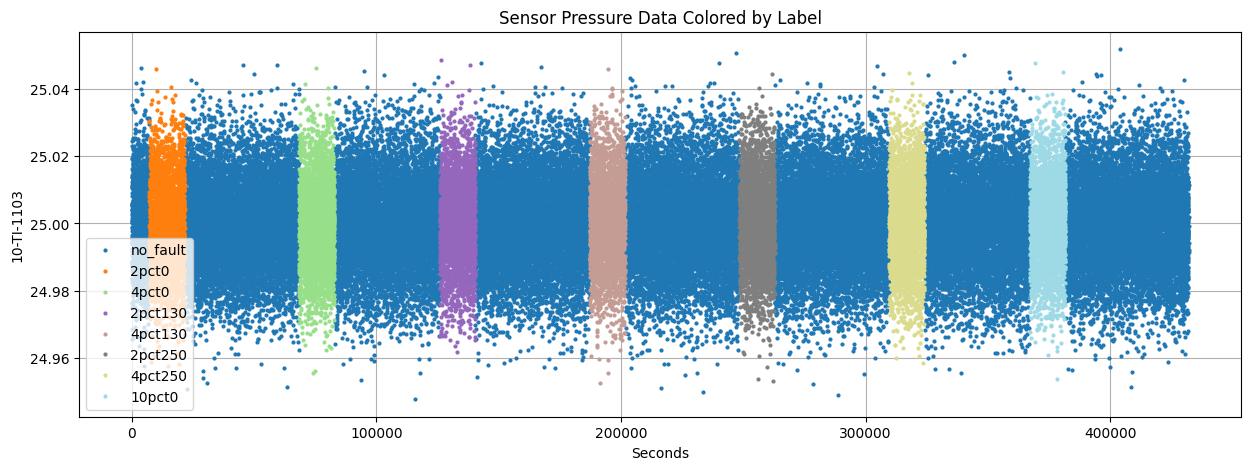

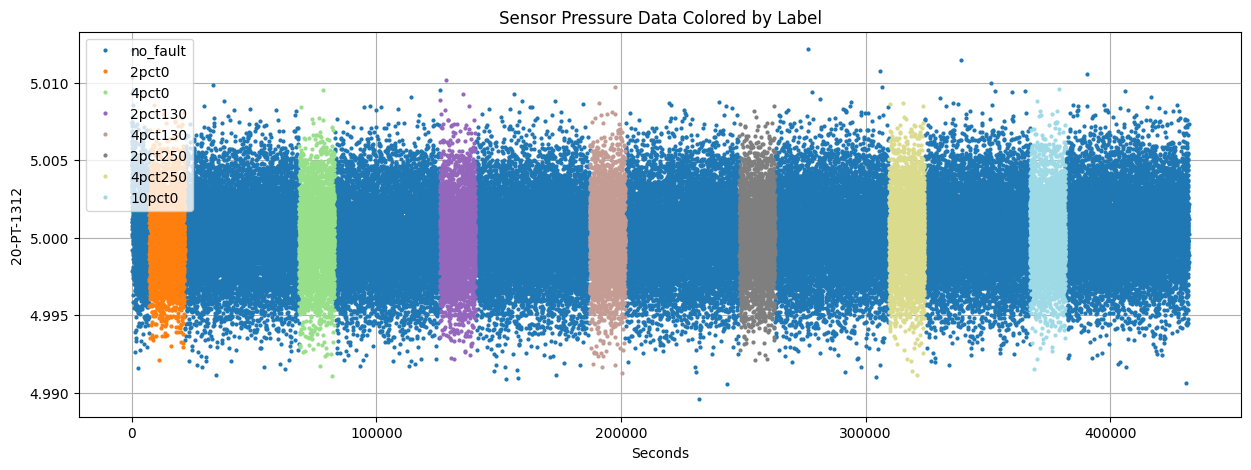

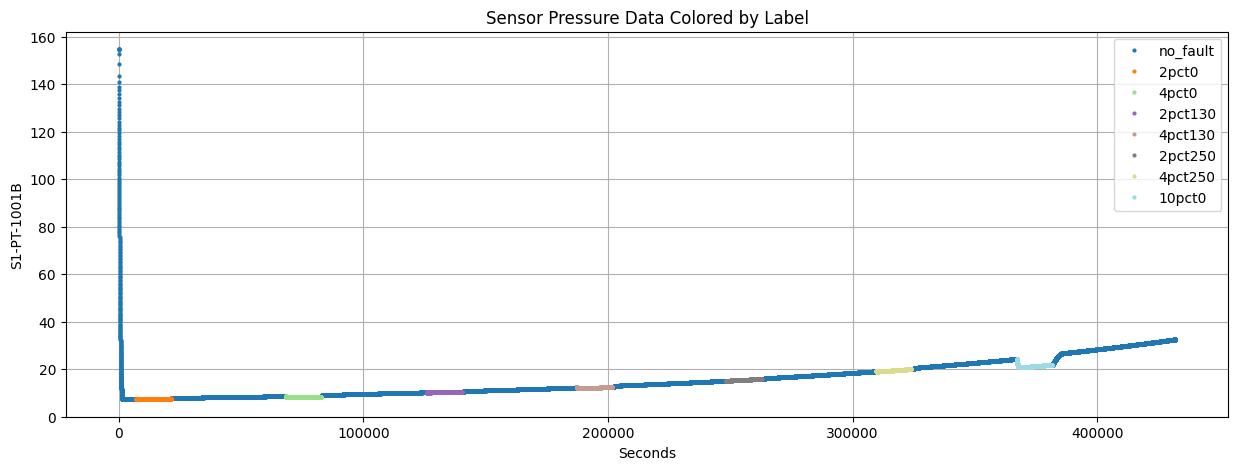

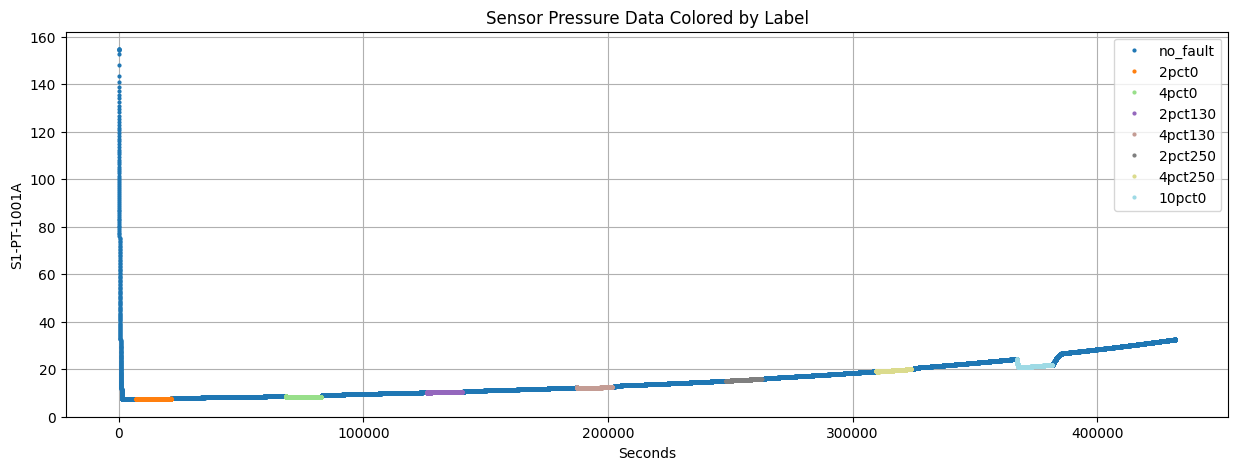

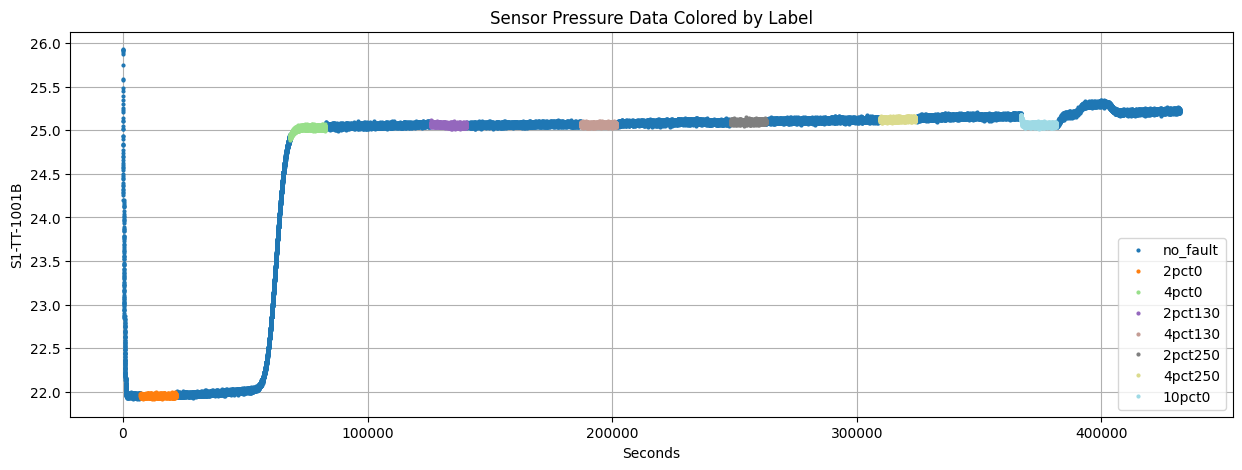

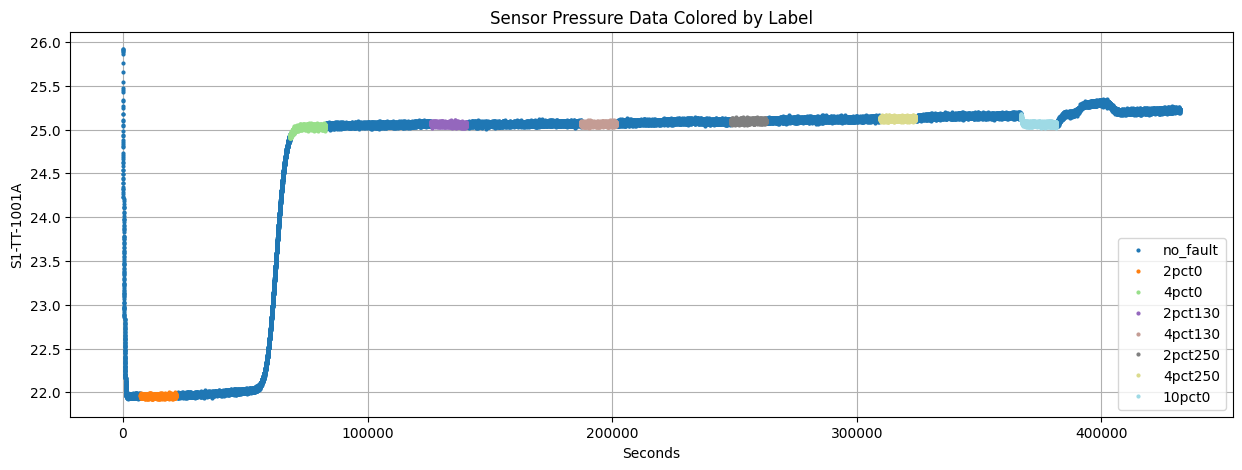

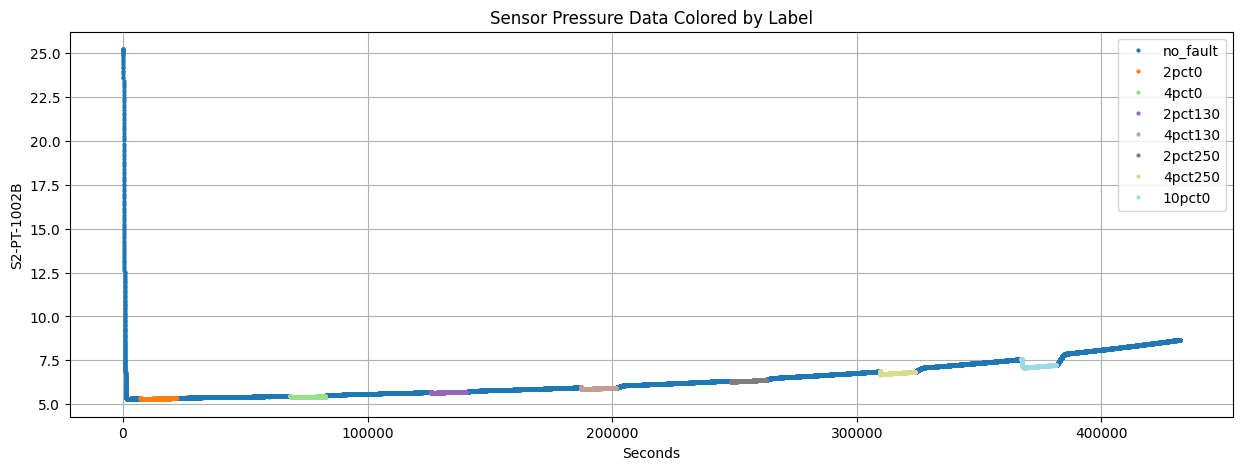

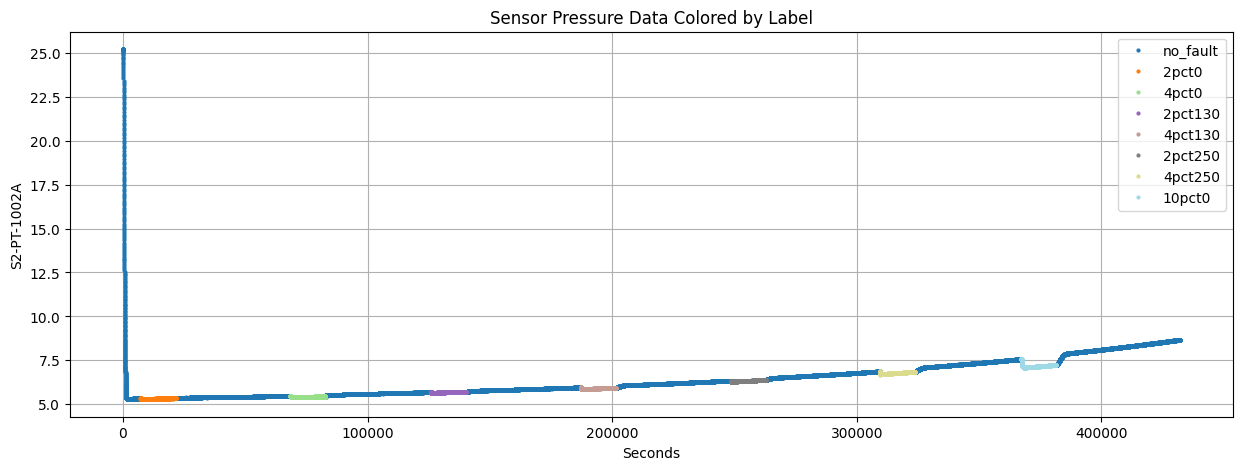

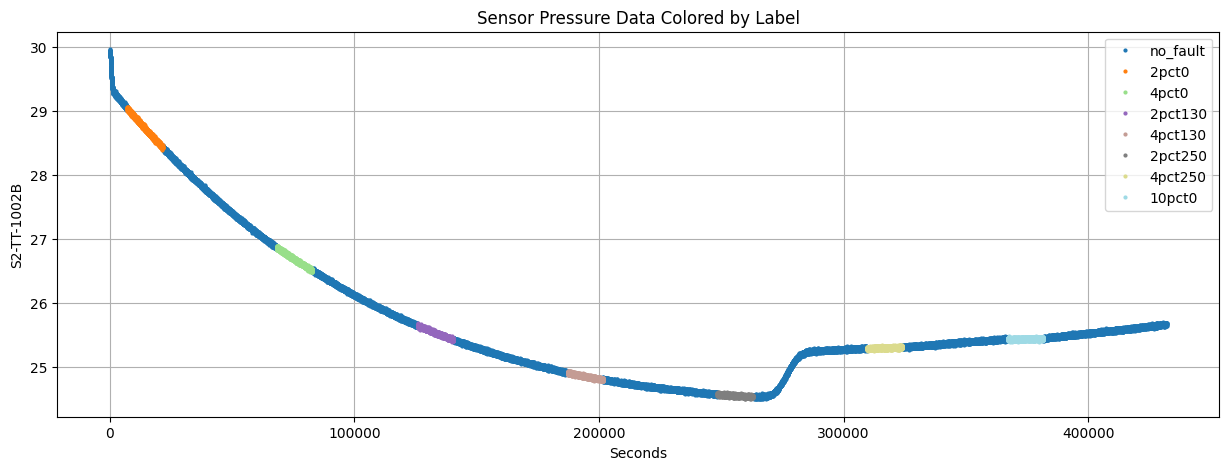

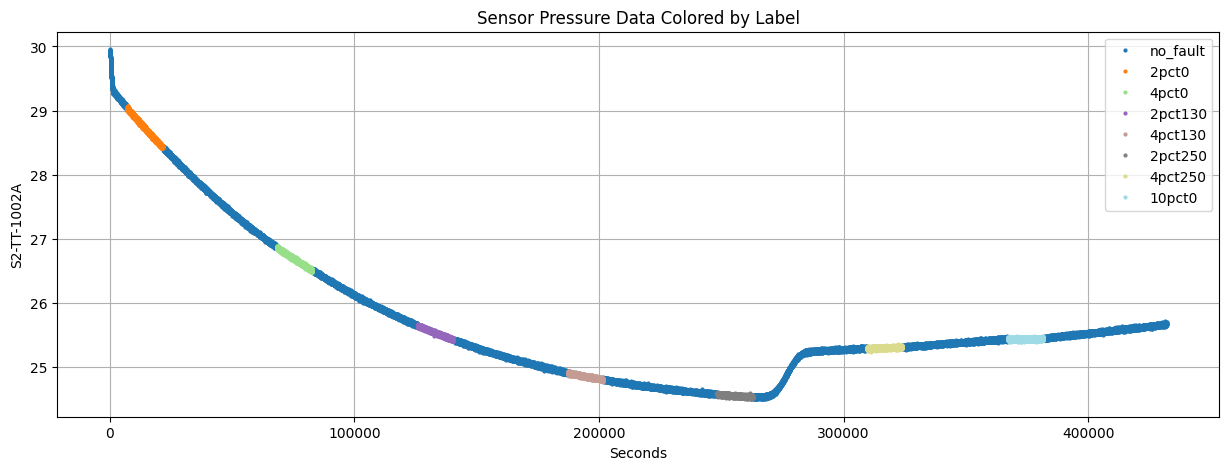

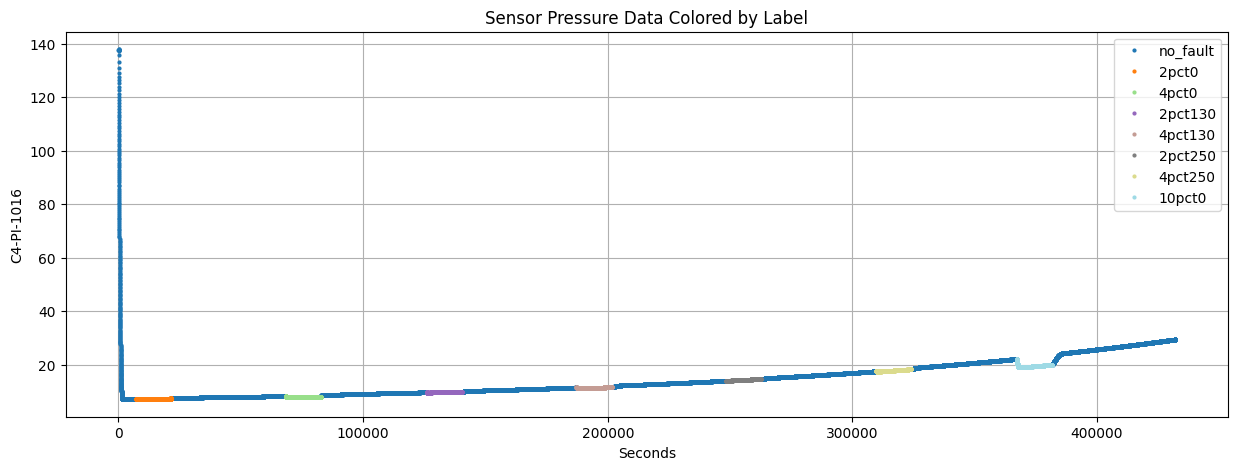

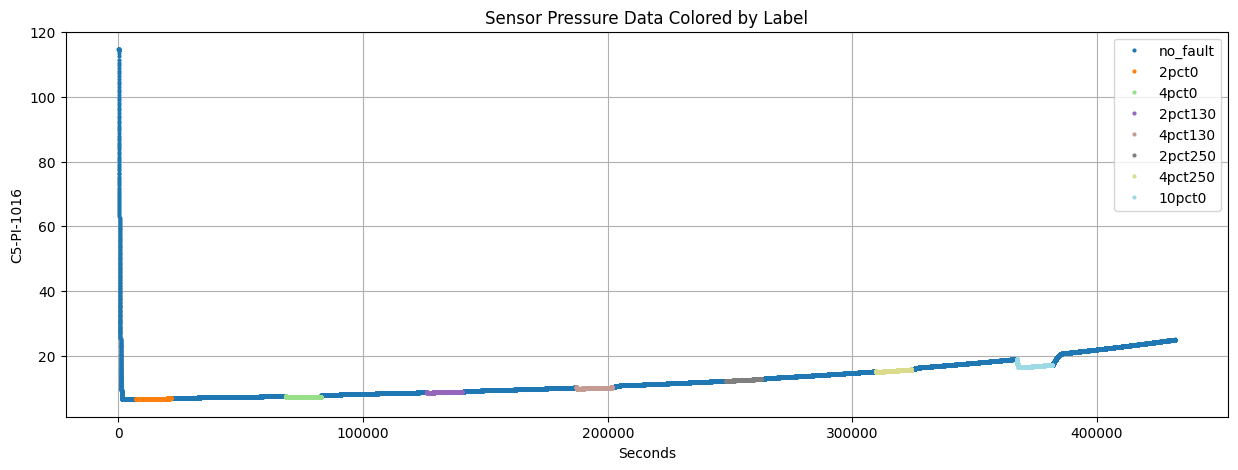

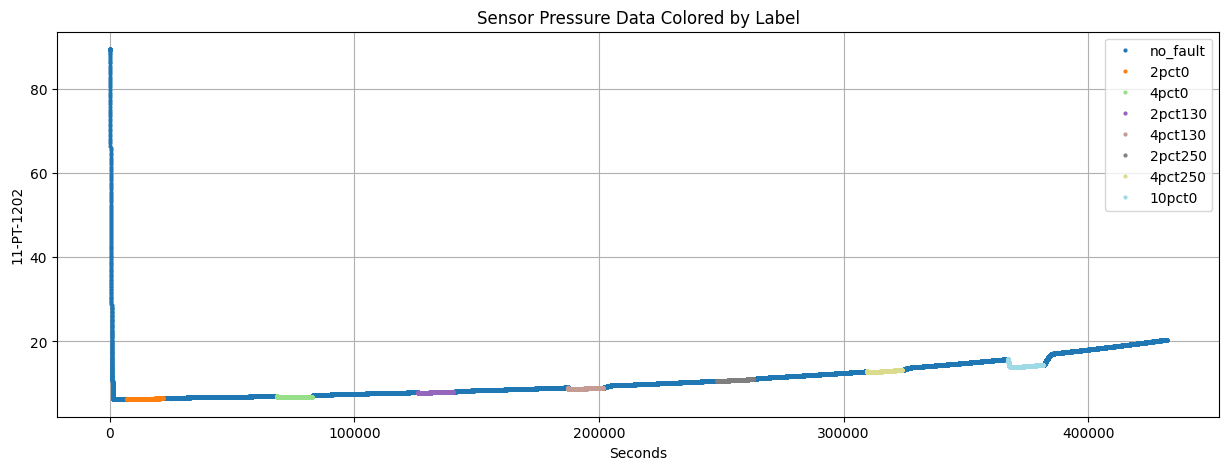

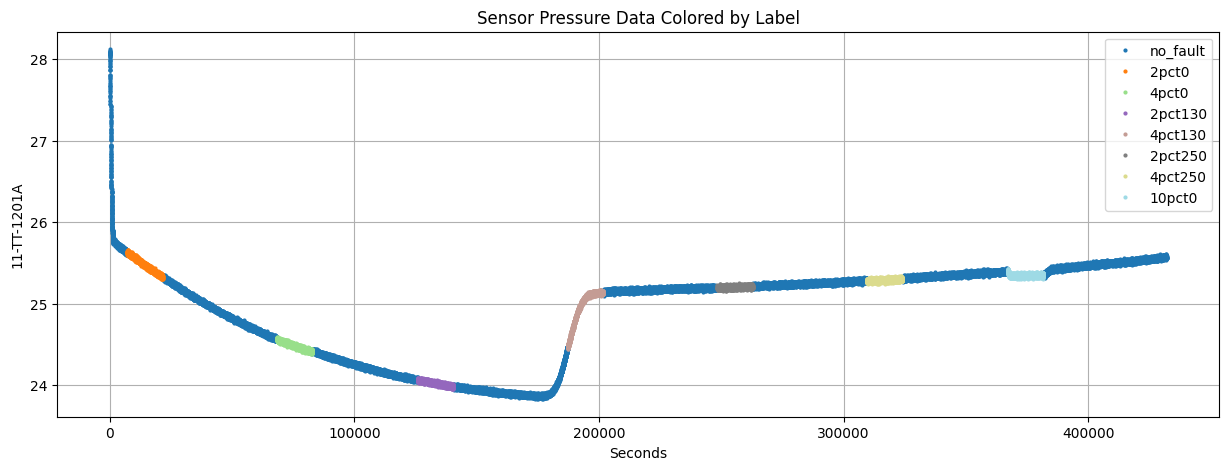

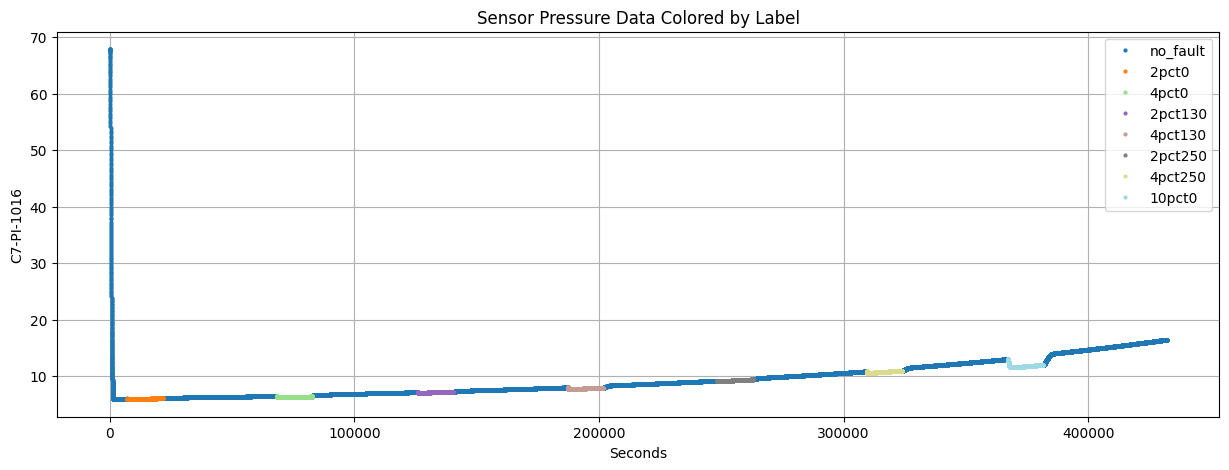

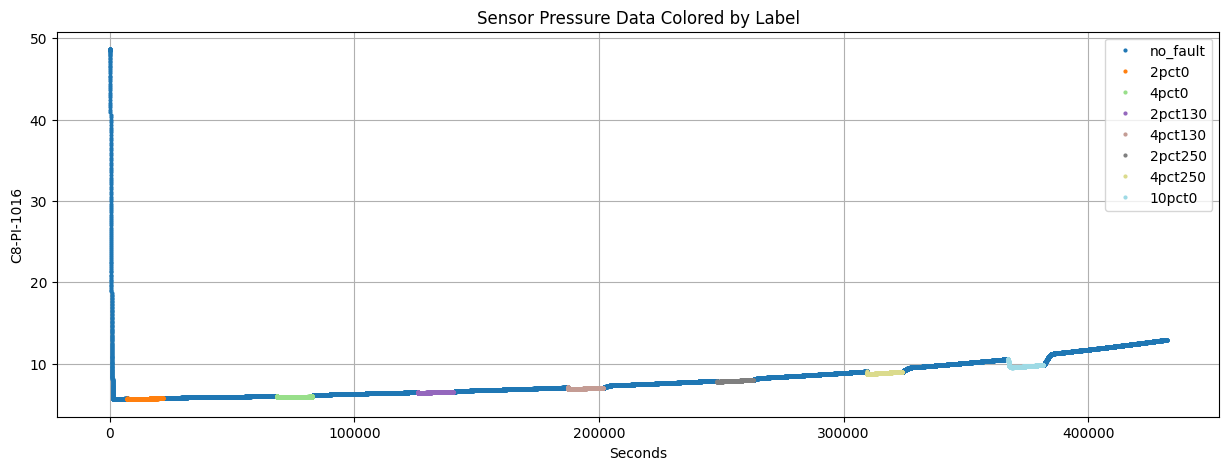

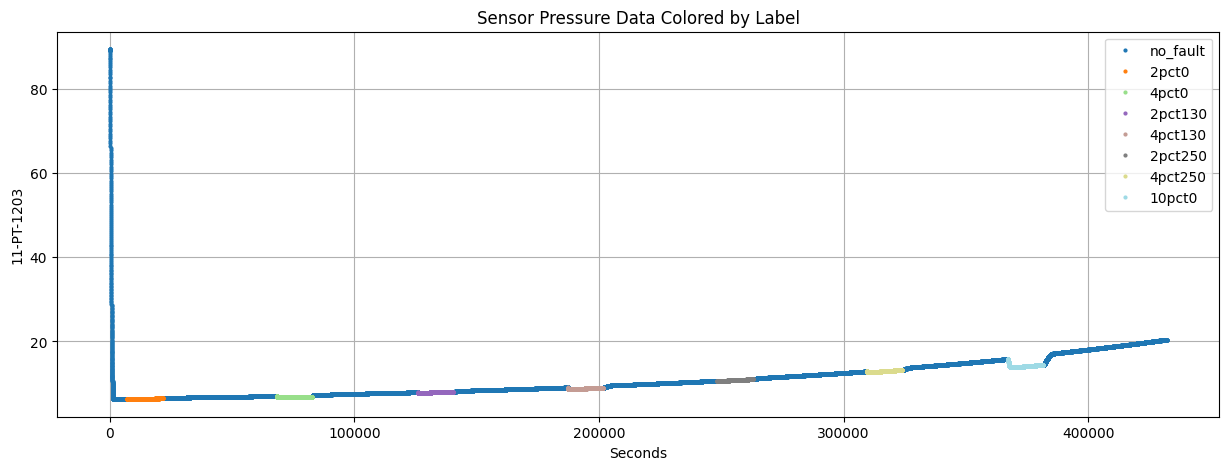

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df already has 'Seconds', 'Pressure', 'label'

# Create a color map based on unique labels
unique_labels = df['label'].dropna().unique()
colors = plt.cm.get_cmap('tab20', len(unique_labels))  # choose colormap

label_to_color = {label: colors(i) for i, label in enumerate(unique_labels)}

# Plot sensor (Pressure) over time with label colors

for col in cols:
    plt.figure(figsize=(15,5))
    for label in unique_labels:
        mask = df['label'] == label
        plt.plot(df['Seconds'][mask], df[col][mask], '.', 
                color=label_to_color[label], label=label, markersize=4)

    plt.xlabel('Seconds')
    plt.ylabel(col)
    plt.title('Sensor Pressure Data Colored by Label')
    plt.legend()
    plt.grid(True)
    plt.show()


In [45]:
df.to_csv(r'G:\GlitchDetect\data\long_run_labelled.csv', index=False)

0        no_fault
1        no_fault
2        no_fault
3        no_fault
4        no_fault
           ...   
86395    no_fault
86396    no_fault
86397    no_fault
86398    no_fault
86399    no_fault
Name: label, Length: 86400, dtype: category
Categories (8, object): ['10pct0', '2pct0', '2pct130', '2pct250', '4pct0', '4pct130', '4pct250', 'no_fault']


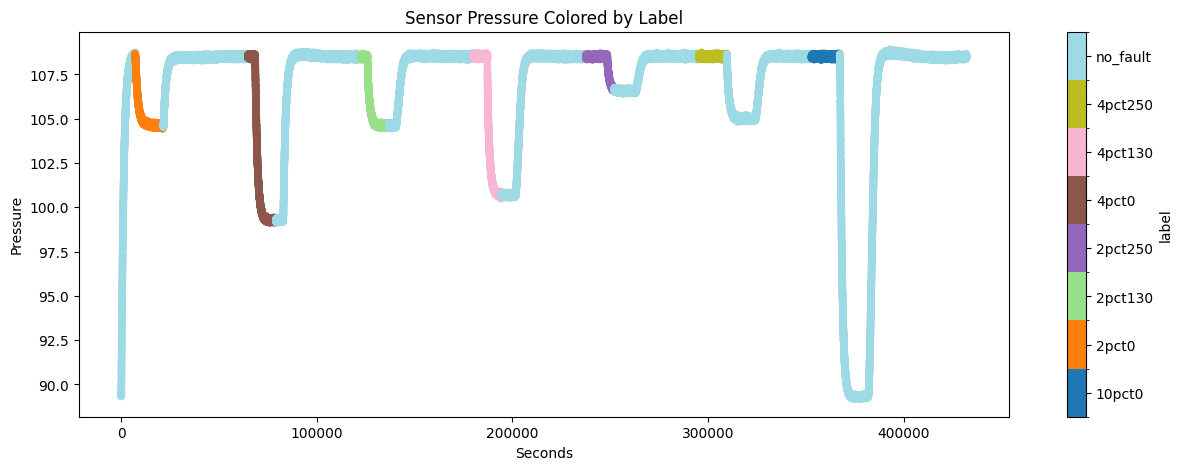

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'label' is categorical
df['label'] = df['label'].astype('category')

print(df['label'])

# Plot Pressure vs Seconds, coloring by label automatically
ax = df.plot.scatter(x='Seconds', y=col, c='label', colormap='tab20', figsize=(15,5))

plt.xlabel('Seconds')
plt.ylabel('Pressure')
plt.title('Sensor Pressure Colored by Label')
plt.show()


,0,1,2,3
0,0,0,0,0.0
1,0.0,0.0,0.0,0.0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
127,0,0.0,0.0,0.0
128,0.0,0.0,0,0
129,0,0,0,0
130,0,0,0,0
